In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 0816050 施雅青

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import os
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from sklearn import metrics
import seaborn as sns
from sklearn.metrics import classification_report
import csv

# Outline
### 1. Data Input
### 2. Data Visualization
#### 2-1 Plot the data distribution by value count of their labels (targets).
####  2-2 Plot the data distribution by value count of top 30 features.
####  2-3 Plot the data distribution by value count of the number of ingredients.
#### 3. Data Preprocessing and Validation Method
#### 4. Artificial Neural Networks
#### 5. Result
#### 6. Write csv file 
#### 7. Comparison & Conclusion
#### 8. Kaggle Submission

# 1. Data Input
從 google drive 讀進來

In [3]:
df = pd.read_json('/content/drive/MyDrive/Colab Notebooks/ML hw5/train.json')

# 2. Data Visualization

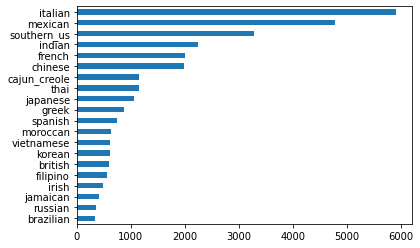

In [4]:
df['cuisine'].value_counts().sort_values().plot(kind = 'barh')

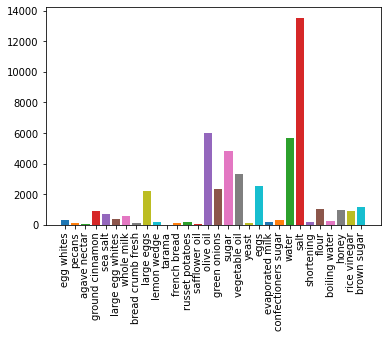

In [5]:
train = df
feature = {}
for i in train['ingredients']:
  for j in i:
    if feature.get(j) == None:
      feature[j] = 1
    else:
      feature[j] += 1
dict(sorted(feature.items(), key=lambda item: item[1]))
# print(feature)
feature_list = list(feature)
# print(feature_list)
for i in range(30):
  plt.bar(feature_list[i], feature[feature_list[i]])
plt.xticks(rotation=90)
plt.show()

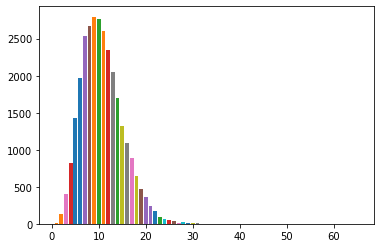

In [6]:
num_ing = {}
for i in train['ingredients']:
  if num_ing.get(len(i)) == None:
    num_ing[len(i)] = 1
  else:
    num_ing[len(i)] += 1
dict(sorted(num_ing.items(), key=lambda item: item[1]))

num_ing_list = list(num_ing)

for i in range(len(num_ing_list)):
  plt.bar(num_ing_list[i], num_ing[num_ing_list[i]])
plt.show()

## 3. Data Preprocessing and Validation Method

In [7]:
# shuffle
df = pd.read_json('/content/drive/MyDrive/Colab Notebooks/ML hw5/train.json').set_index('id')
df = shuffle(df)
train_index = df.index
y = df.cuisine.copy()

test = pd.read_json('/content/drive/MyDrive/Colab Notebooks/ML hw5/test.json').set_index('id')
test_index = test.index
test = shuffle(test)

df_drop = df.drop("cuisine",axis=1)
df_new = pd.concat([df_drop, test],axis=0)
# print(df_new)
df_index = df_new.index

In [8]:
vect = CountVectorizer()
dummies = vect.fit_transform(df_new.ingredients.str.join(' '))
dummies_df = pd.DataFrame(dummies.todense(),columns=vect.get_feature_names())
dummies_df.index = df_index
X = dummies_df.loc[train_index,:]
test_df = dummies_df.loc[test_index,:]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [9]:
y_dum = pd.get_dummies(y)
X_np = X.to_numpy(dtype="float32")
y_np = y_dum.to_numpy("float32") 
X_train, X_val, y_train, y_val = train_test_split(X_np, y_np, test_size=0.3)

## 4. Artificial Neural Networks

In [10]:
from keras.layers import Conv2D, MaxPooling2D, Flatten
model = Sequential()
# model.add(Conv1D(filters=32, kernel_size=10, activation='relu',input_shape=(3010,1)))
# model.add(MaxPooling1D(pool_size=4))
# model.add(Flatten())
model.add(Dense(units=80, input_shape=(3010,), kernel_initializer='uniform'))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(units=y_train.shape[1], kernel_initializer='uniform'))
model.add(Activation('sigmoid'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

model.fit(x=X_train,y=y_train,epochs=10,batch_size=30,validation_split=0.15,verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                240880    
                                                                 
 activation (Activation)     (None, 80)                0         
                                                                 
 dropout (Dropout)           (None, 80)                0         
                                                                 
 dense_1 (Dense)             (None, 20)                1620      
                                                                 
 activation_1 (Activation)   (None, 20)                0         
                                                                 
Total params: 242,500
Trainable params: 242,500
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
591/591 [==============================

In [11]:
# 測試用
score = model.evaluate(x=X_val,y=y_val)
print(score)

280/280 [==============================] - 1s 2ms/step - loss: 0.7620 - accuracy: 0.7818
[0.7619858980178833, 0.7818202376365662]


## 5. Result

In [12]:
def cal_ori_classification(mat, y_dum):
  classification = []
  col_names = y_dum.columns
  res = np.argmax(mat,axis=1)
  for i in range(mat.shape[0]):
    classification.append(col_names[res[i]])
  return classification

              precision    recall  f1-score   support

   brazilian       0.64      0.51      0.56        95
     british       0.54      0.47      0.50       176
cajun_creole       0.75      0.68      0.71       356
     chinese       0.82      0.82      0.82       610
    filipino       0.75      0.54      0.63       171
      french       0.57      0.62      0.60       588
       greek       0.78      0.76      0.77       229
      indian       0.87      0.89      0.88       693
       irish       0.63      0.51      0.56       156
     italian       0.84      0.87      0.86      1785
    jamaican       0.87      0.71      0.78       127
    japanese       0.76      0.75      0.76       327
      korean       0.85      0.72      0.78       186
     mexican       0.88      0.93      0.91      1420
    moroccan       0.77      0.83      0.80       197
     russian       0.48      0.42      0.45        96
 southern_us       0.72      0.78      0.75       969
     spanish       0.67    

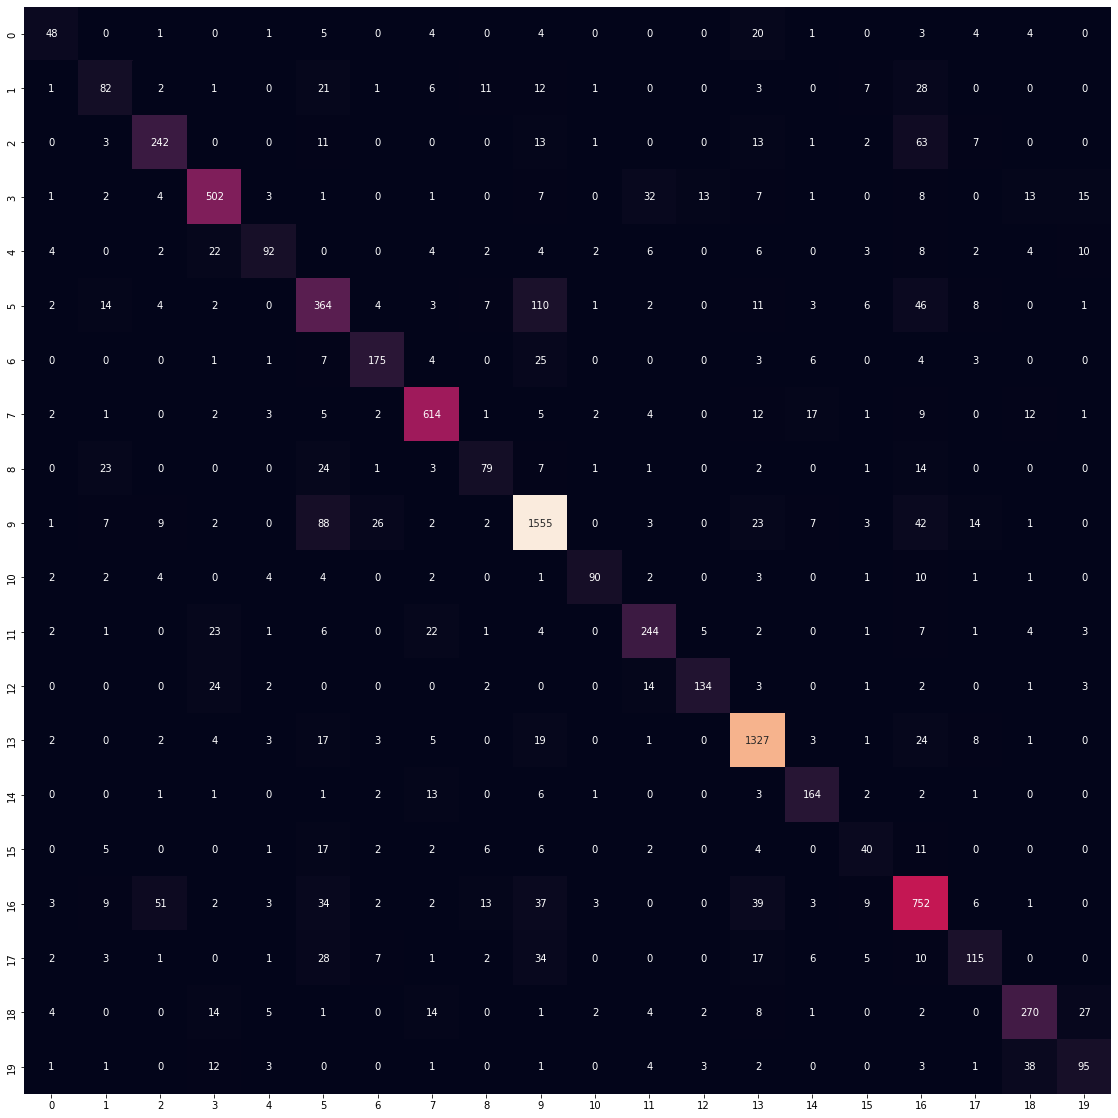

In [13]:
pred_val = model.predict(X_val)
pred_val_cla = cal_ori_classification(pred_val, y_dum)
ori_val_cla = cal_ori_classification(y_val, y_dum)
print(classification_report(ori_val_cla, pred_val_cla))
confusion_matrix = metrics.confusion_matrix(ori_val_cla, pred_val_cla)
print(confusion_matrix)
plt.figure(figsize = (20,20))
sns.heatmap(confusion_matrix, square= True, annot=True, cbar=False, fmt ='.0f')

# 6. Write csv file

In [14]:
test_np = test_df.to_numpy()
pred = model.predict(test_np)
pred_res = np.argmax(pred,axis=1)
col_names = y_dum.columns
# for i in range(test_df.shape[0]):
  # print(test_df.index[i],end=',')
  # print(col_names[pred_res[i]])
with open('/content/drive/MyDrive/Colab Notebooks/ML hw5/0816050.csv', 'w', newline='') as f:
  writer = csv.writer(f)
    # writer = csv.writer(f, quoting=csv.QUOTE_ALL,delimiter=';')
  f.write('id,Category\n')
  for i in range(test_df.shape[0]):
    row = ''
    row += str(test_df.index[i])
    row += ','
    row += col_names[pred_res[i]]
    row += '\n'
    f.write(row)
f.close()

# 7. Comparison & Conclusion

1. 在 model construction 的部分，曾使用 conv1D 作為 layer，但發覺 accuracy 大約在 0.76 左右就不能再更好了，相較於只用全連階層的效果更差，因此最後放棄使用卷積層。
2. 第一次 submit 預測結果時成績為 0.78766，由於有過擬合的情況，因此我在兩全連階層之間加入了 dropout 避免過擬合，accuracy 也提升至最後的 0.794。

# 8. Kaggle Submission

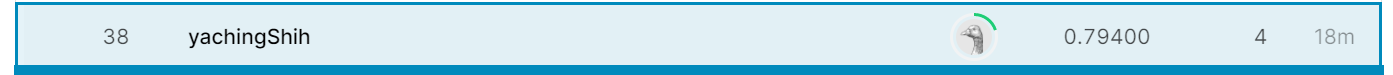